---
title: python-graphviz图数据可视化入门
date: 2018-09-25 20:17:55
tags: [graphviz]
toc: true
xiongzhang: false

---
<span></span>
<!-- more -->


本文代码运行环境:

- windows10
- python3.6
- jupyter notebook

### 安装 

graphviz为Graphviz图形绘制软件提供了一个简单的纯Python接口。它在Python 2.7和3.4+下运行。要使用pip安装它，请运行以下命令：

```
pip install graphviz
```

### 依赖

graphviz有一个同名依赖`graphviz`, 这是一个c开发的软件包, 可以通过命令行调用。它的安装很简单, 如果在windows下, 只需要下载二进制包进行安装即可, 具体过程参考这篇文章的[安装Graphviz](http://mlln.cn/2018/09/21/pydotplus%E5%AE%89%E8%A3%85%E5%92%8C%E5%9F%BA%E6%9C%AC%E5%85%A5%E9%97%A8/#%E5%AE%89%E8%A3%85Graphviz)部分。

### 基本用法


graphviz模块提供两个类：`Graph`和`Digraph`。他们使用DOT语言为无向和有向图创建图形描述。他们有相同的API。

通过实例化新的Graph或Digraph对象来创建图形：

In [2]:
from graphviz import Digraph
dot = Digraph(comment='这是一个有向图')
str(dot)

'// 这是一个有向图\ndigraph {\n}'

它们的构造函数允许设置图形的`name`，DOT代码的`filename`，源代码行的注释等。

使用`node（）`和`edge（）`或`edges（）`方法将节点和边添加到图形对象：

- `node()`方法第一个参数是name, 第二个参数是label
- `edges()`方法可以一次添加多个边, 每个边用字符串表示, 比如`AB`表示从A到B的边
- `edge()`方法一次添加一个边

In [7]:
dot = Digraph(comment='这是一个有向图')
dot.node('A', '作者')
dot.node('B', '医生')
dot.node('C', '律师')

dot.edges(['AB', 'AC'])
dot.edge('B', 'C')
print(dot.source)

// 这是一个有向图
digraph {
	A [label="作者"]
	B [label="医生"]
	C [label="律师"]
	A -> B
	A -> C
	B -> C
}


使用`render`方法将保存dot源码, 并且会渲染图形, 使用`view=True`参数可以自动打开应用程序以便浏览生成的图:

In [8]:
# 将dot源码保存到文件:output-graph.gv
# 同时会生成一个pdf文件: output-graph.gv.pdf
dot.render('output-graph.gv', view=True)

'output-graph.gv.pdf'

除了PDF, 还可以生成其他格式, 比如png:

In [13]:
dot.format = 'png'
dot.render('output-graph.gv', view=True)

'output-graph.gv.png'

由于这是jupyter notebook环境, 我们直接使用notebook展示生成的图片即可:

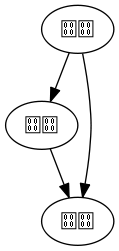

In [14]:
from IPython.display import display, Image
Image(dot.render('output-graph.gv'))

### 字体乱码

我们可以看到中文的label无法正确显示在图中, 因为默认的字体并不支持中文, 需要我们为node设置字体, 比如我们设置成黑体:


(dot.exe:10280): Pango-WARNING **: couldn't load font "Heiti Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


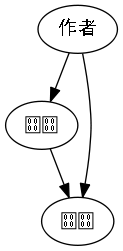

In [19]:
dot = Digraph(comment='这是一个有向图')
dot.node('A', '作者', fontname="Heiti")
dot.node('B', '医生')
dot.node('C', '律师')
dot.edges(['AB', 'AC'])
dot.edge('B', 'C')
dot.format = 'png'
Image(dot.render('output-graph-font.gv'))


### piped输出

为了直接获取Graphviz软件渲染结果, 而不是让它保存到文件中, 我们可以使用`pipe()`方法, 比如我们可以直接获取渲染后的svg源码:

In [21]:
from graphviz import Graph
h = Graph('hello', format='svg')
h.edge('Hello', 'World')
print(h.pipe().decode('utf-8'))  

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: hello Pages: 1 -->
<svg width="77pt" height="116pt"
 viewBox="0.00 0.00 76.89 116.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 112)">
<title>hello</title>
<polygon fill="white" stroke="none" points="-4,4 -4,-112 72.8939,-112 72.8939,4 -4,4"/>
<!-- Hello -->
<g id="node1" class="node"><title>Hello</title>
<ellipse fill="none" stroke="black" cx="34.4469" cy="-90" rx="29.795" ry="18"/>
<text text-anchor="middle" x="34.4469" y="-86.3" font-family="Times New Roman,serif" font-size="14.00">Hello</text>
</g>
<!-- World -->
<g id="node2" class="node"><title>World</title>
<ellipse fill="none" stroke="black" cx="34.4469" cy="-18" rx="34.394" ry="18"/>
<text tex

### jupyter notebook中显示

因为Graph和Bigraph类都有`_repr_svg_()`方法, 因此他们可以直接显示在notebook中, 而不需要做任何处理, 例如, 上面的svg图, 可以直接显示:

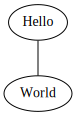

In [22]:
h

### 显示风格

使用`graph_attr`, `node_attr`, `edge_attr`参数, 你可以更改图中节点和边的显示样式:

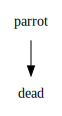

In [23]:
ps = Digraph(name='pet-shop', node_attr={'shape': 'plaintext'})
ps.node('parrot')
ps.node('dead')
ps.edge('parrot', 'dead')
ps

创建完毕以后, 你可以更改这些样式:

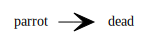

In [24]:
ps.graph_attr['rankdir'] = 'LR'
ps.edge_attr.update(arrowhead='vee', arrowsize='2')
ps

### 属性

我们可以直接更改图中所有节点和边的属性, 相当于全局配置, 只要使用`attr`方法即可:

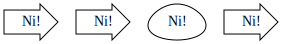

In [27]:
ni = Graph('ni')
# 设置所有节点的形状
ni.attr('node', shape='rarrow')
ni.node('1', 'Ni!')
ni.node('2', 'Ni!')
# 如果单独设置, 优先级更高
ni.node('3', 'Ni!', shape='egg')
ni.node('4', 'Ni!')
ni

### 使用引号和HTML作为label

在label中使用引号需要使用转义字符`\`:

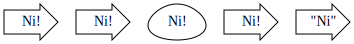

In [28]:
ni.node('5', '\"Ni\"')
ni

在label中使用html可以使用`< >`将html内容括起来, 比如, 我们可以使用下标`sub`:

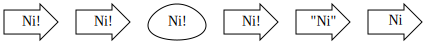

In [36]:
ni.node('6', '<N<sub>i</sub>>')
ni

### 子图和集群

`Graph`和`Bigraph'对象都有`subgraph()`方法用于添加子图, 它有两种用法:

- 可以直接添加一个Graph或者Bigraph对象:

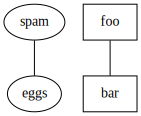

In [37]:
p = Graph(name='parent')
p.edge('spam', 'eggs')

c = Graph(name='child', node_attr={'shape': 'box'})
c.edge('foo', 'bar')

p.subgraph(c)
p

- 使用`with`代码块:

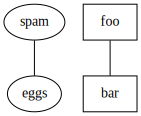

In [38]:
p = Graph(name='parent')
p.edge('spam', 'eggs')

with p.subgraph(name='child', node_attr={'shape': 'box'}) as c:
   c.edge('foo', 'bar')
p

### 引擎

渲染引擎可以选择多种, 而不仅仅是`dot`, 比如你可以使用`neato`:


In [39]:
g = Graph(engine='neato')

或者也可以直接更改渲染引擎:

In [40]:
g.engine = 'circo'

### 添加dot语句

有些应用场景是需要使用已经写好的dot语句的, 这时候我们可以直接调用`body.append`方法来追加dot语句:

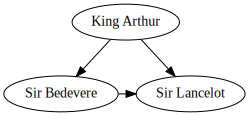

In [41]:
rt = Digraph()
rt.body.append('\t"King Arthur" -> {\n\t\t"Sir Bedevere", "Sir Lancelot"\n\t}')
rt.edge('Sir Bedevere', 'Sir Lancelot', constraint='false')
rt

### 使用dot文件和源码

我们可以直接使用`Source`类来直接实例化一个Source对象, 传入的参数就是dot源码, 然后可以调用render方法渲染成图片:

In [43]:
from graphviz import Source
src = Source('digraph "the holy hand grenade" { rankdir=LR; 1 -> 2 -> 3 -> lob }')
str(src)

'<graphviz.files.Source object at 0x000002953EFFE908>'

我们还可以直接使用`from_file`方法来从一个dot文件实例化:


(dot.exe:14100): Pango-WARNING **: couldn't load font "Heiti Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


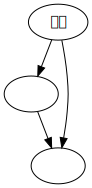

In [46]:
src = Source.from_file('output-graph-font.gv')
src

### 使用临时文件浏览图

很多时候我们要多次浏览绘制的图, 但是又不想保存这个文件, 那么我们可以使用临时文件保存生成的结果:

In [47]:
import tempfile

g = Graph()
g.node('spam')

g.view(tempfile.mktemp('.gv'))  

'C:\\Users\\syd\\AppData\\Local\\Temp\\tmp48i7e5z2.gv.pdf'